In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report,accuracy_score
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
data_Tr=pd.read_csv("C:\\Users\mm\\Desktop\\train.csv",encoding='latin-1')
data_Te=pd.read_csv("C:\\Users\\mm\\Desktop\\test.csv",encoding='latin-1')

In [63]:
data_Tr.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [64]:
data_Te.head(10)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
5,726e501993,that`s great!! weee!! visitors!,positive,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative,morning,0-20,Argentina,45195774.0,2736690.0,17.0
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative,noon,21-30,Armenia,2963243.0,28470.0,104.0
8,e64208b4ef,and within a short time of the last clue all ...,neutral,night,31-45,Australia,25499884.0,7682300.0,3.0
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral,morning,46-60,Austria,9006398.0,82400.0,109.0


In [65]:
data_Tr.shape

(27481, 10)

In [66]:
data_Te.shape

(4815, 9)

In [67]:
data_Tr.isna().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [68]:
data_Te.isna().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [69]:
data_Tr=data_Tr.dropna()

In [70]:
data_Te=data_Te.dropna()

In [71]:
data_Tr.isna().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [72]:
data_Te.isna().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [73]:
data_Tr.shape

(27480, 10)

In [74]:
data_Te.shape

(3534, 9)

In [51]:
data_Tr = data_Tr.reset_index(drop=True)

In [75]:
data_Tr

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


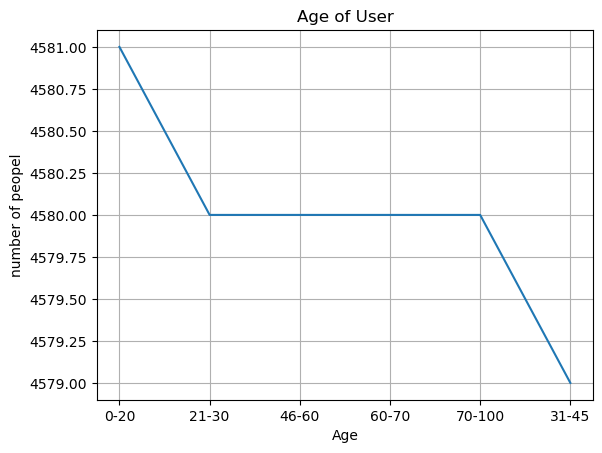

In [23]:
data_Tr['Age of User'].value_counts().plot(kind="line",xlabel="Age", ylabel="number of peopel")
plt.grid(True)
plt.title("Age of User")
plt.show()

In [114]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

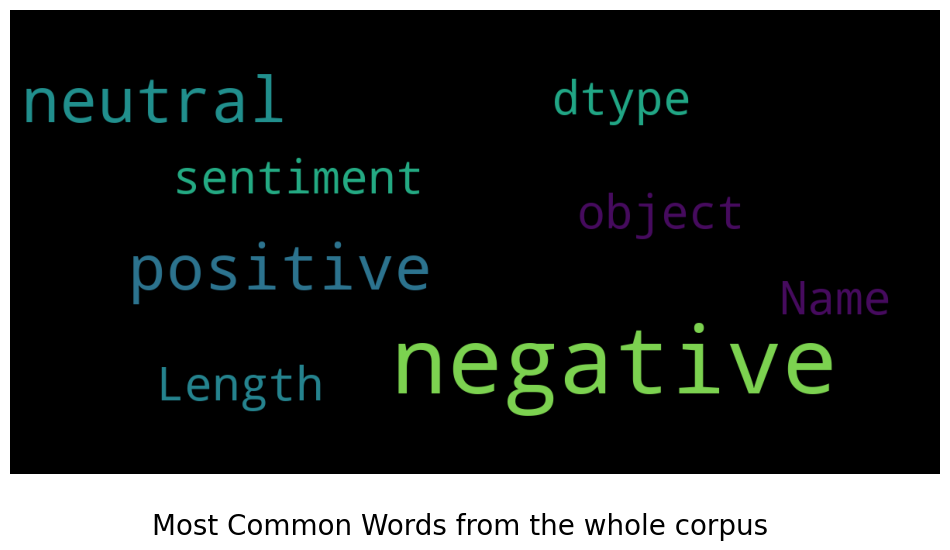

In [115]:
show_wordcloud(data_Tr['sentiment'],'Most Common Words from the whole corpus')

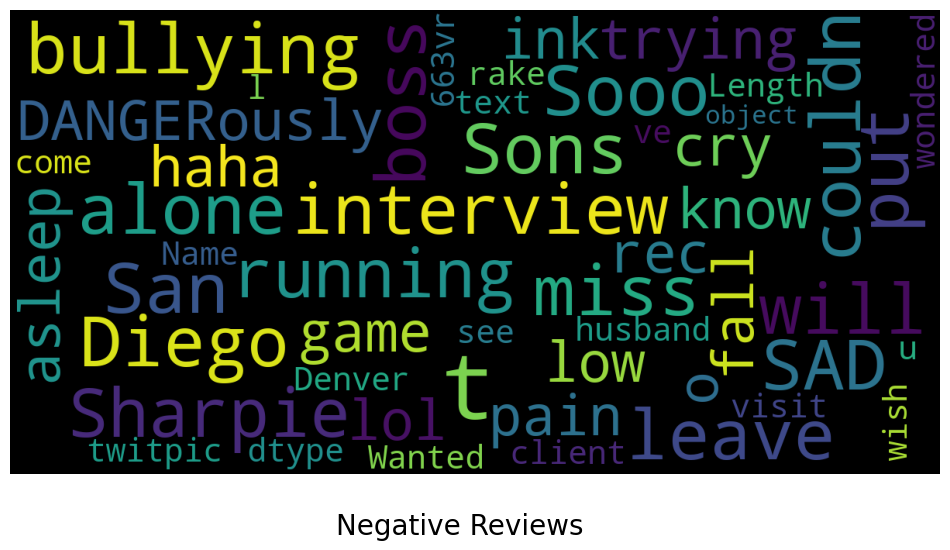

In [116]:
show_wordcloud(data_Tr[data_Tr['sentiment'] == "negative"]['text'],'Negative Reviews')

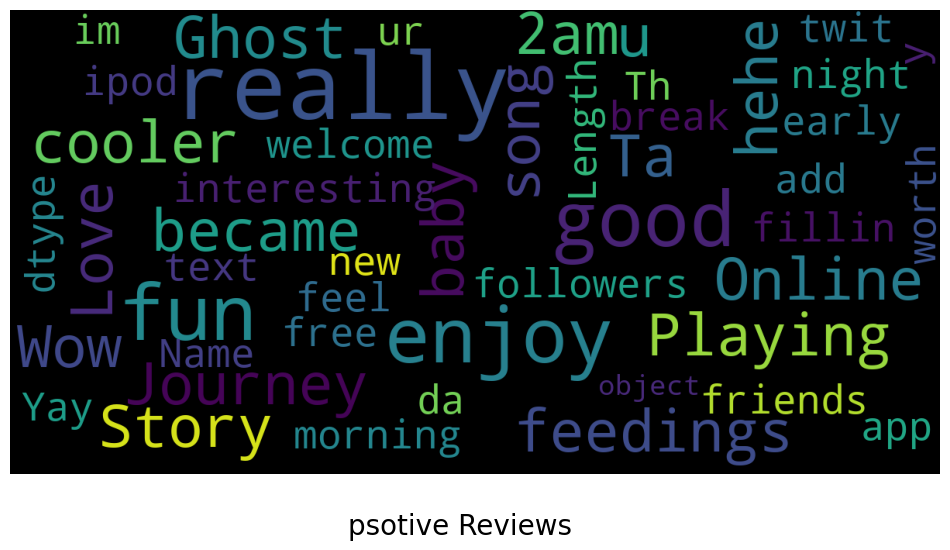

In [117]:
show_wordcloud(data_Tr[data_Tr['sentiment'] == "positive"]['text'],'psotive Reviews')

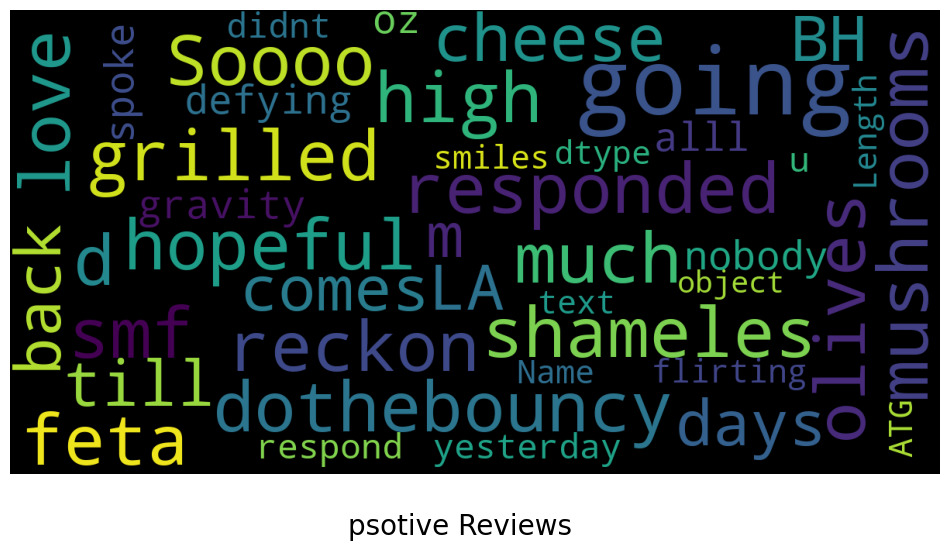

In [118]:
show_wordcloud(data_Tr[data_Tr['sentiment'] == "neutral"]['text'],'neutral Reviews')

C:\Users\mm\AppData\Local\Temp\ipykernel_7328\773766142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_Tr.corr())


<Axes: >

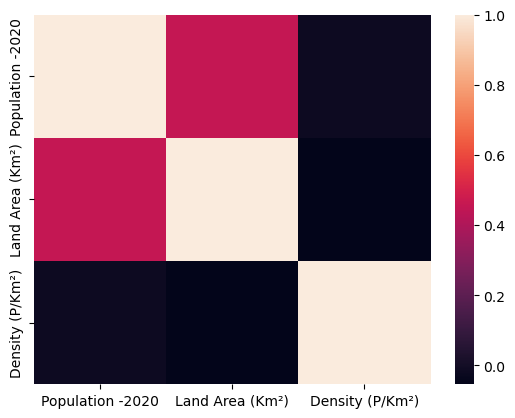

In [119]:
sns.heatmap(data_Tr.corr())

In [68]:
asd=data_Tr.groupby("Age of User")["sentiment"].agg(np.sum)

<Axes: >

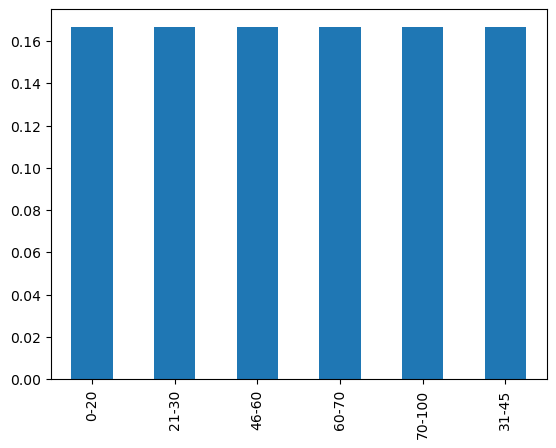

In [29]:
data_Tr["Age of User"].value_counts("sentiment").plot(kind="bar")

In [76]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
full_text = list(data_Tr['text'].values) + list(data_Te['text'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(data_Tr['text'])
test_vectorized = vectorizer.transform(data_Te['text'])

In [77]:
y = data_Tr['sentiment']

In [78]:
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

In [79]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
print(classification_report( lr.predict(x_val) , y_val))
print(accuracy_score( lr.predict(x_val) , y_val ))

              precision    recall  f1-score   support

    negative       0.48      0.76      0.59       995
     neutral       0.83      0.57      0.67      3238
    positive       0.61      0.81      0.69      1263

    accuracy                           0.66      5496
   macro avg       0.64      0.71      0.65      5496
weighted avg       0.71      0.66      0.66      5496

0.6593886462882096


In [80]:
lr.score(x_train,y_train)

0.9462791120815138